Nama : Nabila Ramadhanty

NIM : H071201006

MID Pengantar Data Science

CLASSIFICATION

In [2]:
#Read Dataset

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
%matplotlib inline

Informasi data

https://archive.ics.uci.edu/ml/datasets/IrisInformasi

In [3]:
data = pd.read_csv('/content/iris.data')
data.head(5)

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
#Atribut Data
data.columns =["sepal length", "sepal width","petal length", "petal width", "class"]

In [5]:
data.head(5)

,sepal length,sepal width,petal length,petal width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print('Jumlah data train:',len(X_train))
print('Jumlah data test :',len(X_test))

Jumlah data train: 111
Jumlah data test : 38


In [7]:
import seaborn as sn
import matplotlib.pyplot as plt

## Set theme ##
sn.set_theme(style='darkgrid')

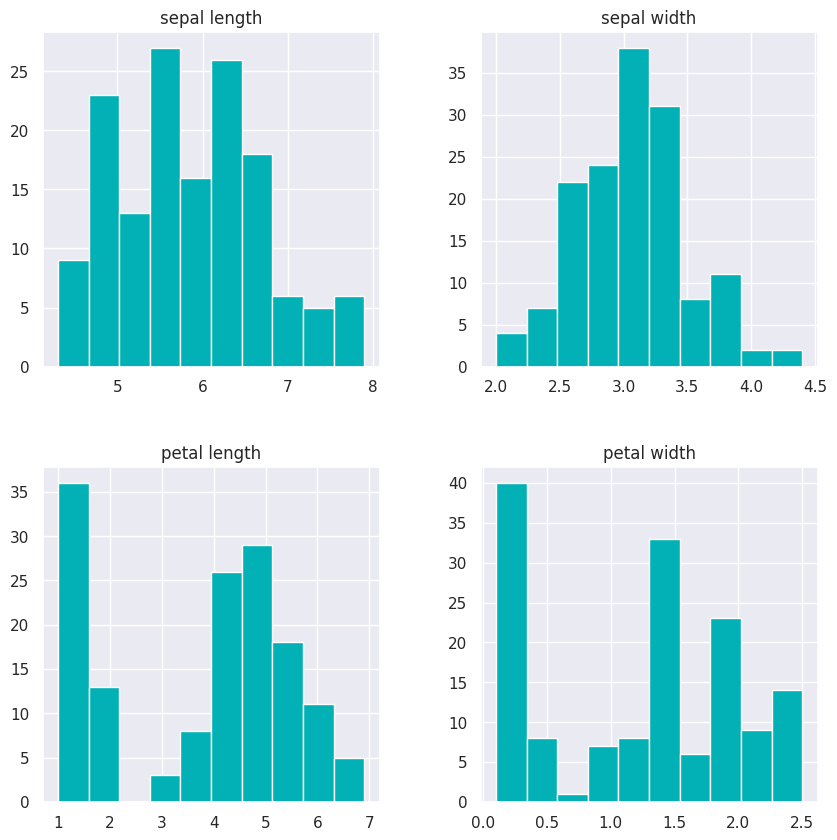

In [8]:
## Visualisasi Data X ##
data.iloc[:,:-1].hist(figsize=(10,10), color='#01b1b5')
plt.show()

KKN

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [10]:
knn_method = KNeighborsClassifier()
knn_method.fit(X_train, y_train) 
y_pred_knn = knn_method.predict(X_test)

score_knn = metrics.accuracy_score(y_pred_knn,y_test)



print('Akurasi metode KNN: ',round(score_knn,8), ' atau ', round(score_knn*100,2),'%', sep='')

Akurasi metode KNN: 1.0 atau 100.0%


In [11]:
## Evaluasi model ##
k = 10
mean_acc = []
std_acc = []

for i in range(1,k):
    knn_method = KNeighborsClassifier(n_neighbors = i)
    knn_method.fit(X_train, y_train)
    y_pred_knn = knn_method.predict(X_test)
    mean_acc.append(metrics.accuracy_score(y_pred_knn, y_test))
    std_acc.append(np.std(y_pred_knn==y_test)/np.sqrt(y_pred_knn.shape[0]))
    
mean_acc

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [ ]:
knn_method = KNeighborsClassifier()
knn_method.fit(X_train, y_train) 
y_pred_knn = knn_method.predict(X_test)

score_knn = metrics.accuracy_score(y_pred_knn,y_test)

print('Akurasi metode KNN: ',round(score_knn,8), ' atau ', round(score_knn*100,2),'%', sep='')

Akurasi metode KNN: 0.24521531 atau 24.52%


In [ ]:
k = 11
mean_acc = []
std_acc = []
for i in range(2,k):
  knn_method = KNeighborsClassifier(n_neighbors = i)
  knn_method.fit(X_train, y_train)
  y_pred_knn = knn_method.predict(X_test)
  score_knn = metrics.accuracy_score(y_pred_knn, y_test)
  mean_acc.append(score_knn)
  std_acc.append(np.std(y_pred_knn == y_test)/np.sqrt(y_pred_knn.shape[0]))

mean_acc

[0.20813397129186603,
 0.22009569377990432,
 0.22966507177033493,
 0.2452153110047847,
 0.2452153110047847,
 0.23564593301435408,
 0.23205741626794257,
 0.23684210526315788,
 0.2284688995215311]

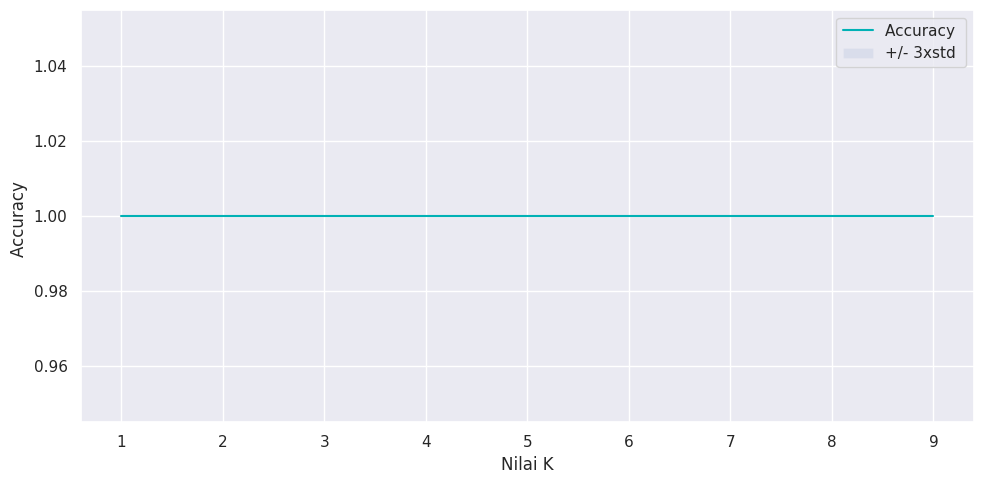

In [12]:
## K-NN ##
plt.figure(figsize = (10,5))
plt.plot(range(1,k),mean_acc, color='#01b1b5')
plt.fill_between(range(1,k),
                np.array(mean_acc) - 1 * np.array(std_acc),
                mean_acc + 1 * np.array(std_acc), 
                alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Nilai K')
plt.tight_layout()
plt.show()

In [13]:
print("Nilai Akurasi terbaik ada pada ", 
      round(np.array(mean_acc).max()*100,2), 
      "% dengan k = ", np.array(mean_acc).argmax()+1, sep='') 

Nilai Akurasi terbaik ada pada 100.0% dengan k = 1


Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
tree_method = DecisionTreeClassifier()
tree_method.fit(X_train, y_train)
y_pred_tree = tree_method.predict(X_test)
score_tree = metrics.accuracy_score(y_pred_tree, y_test)
print('Akurasi Prediksi method Tree : ',round(score_tree,8), ' atau ',round(score_tree*100,2),'%', sep='')

Akurasi Prediksi method Tree : 1.0 atau 100.0%


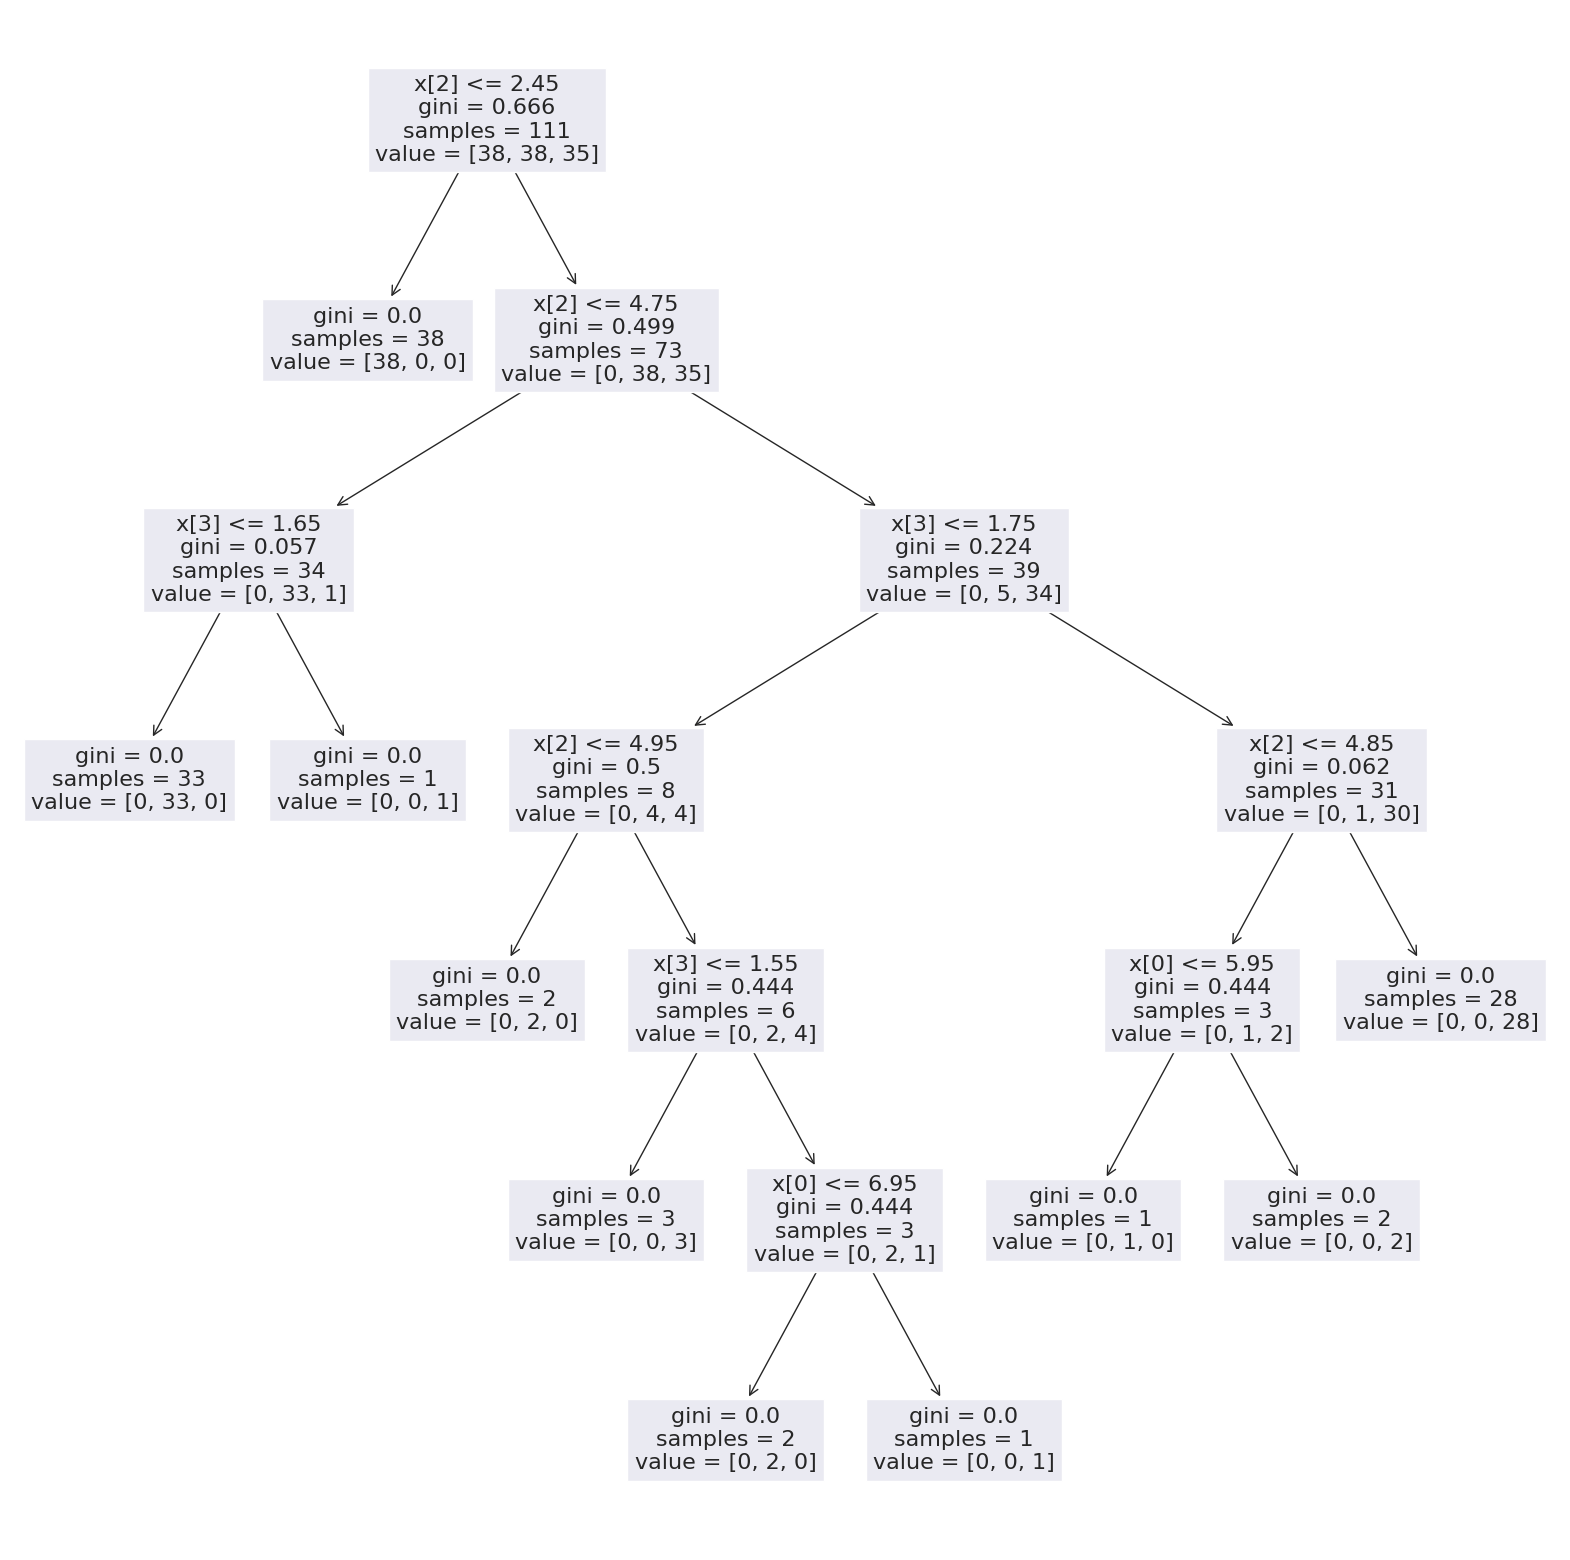

In [16]:
## Evaluasi Model ##

from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(tree_method)
plt.show()

Naive Bayes

In [17]:
from sklearn import naive_bayes

In [18]:
bayas_method = naive_bayes.BernoulliNB()
bayas_method.fit(X_train, y_train)
y_pred_bayes = bayas_method.predict(X_test)
score_bayes = metrics.accuracy_score(y_pred_bayes, y_test)
print('Akurasi Prediksi Bayes : ',round(score_bayes,8), ' atau ',round(score_bayes*100,2),'%', sep='')

Akurasi Prediksi Bayes : 0.28947368 atau 28.95%


In [19]:
def get_conf_matriks(y_actual, y_predic, cmap = None, title='Tidak ada', ):
    confusion_matrix = metrics.confusion_matrix(y_actual, y_predic)

    
    conf_matrix_value = (confusion_matrix[0,0] + confusion_matrix[1,1]) / sum(sum(confusion_matrix))
    print("Hasil Confution Matriks :" , round(conf_matrix_value*100,2), "%", sep='')

In [20]:
get_conf_matriks(y_test, y_pred_knn, title='Matriks Confution K-NN')

Hasil Confution Matriks :60.53%


In [21]:
get_conf_matriks(y_test, y_pred_bayes, title='Matriks Confution Nive Bayes')

Hasil Confution Matriks :28.95%


In [22]:
get_conf_matriks(y_test, y_pred_tree, title='Matriks Confution Decition Tree')

Hasil Confution Matriks :60.53%


REGRESSION

In [ ]:
#read data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
## Set theme ##
sn.set_theme(style='darkgrid')
data_olah = pd.read_csv('/content/Real-estate-valuation-data-set.csv')

Informasi data = https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set

In [ ]:
data_olah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
data_olah.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
data_olah.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

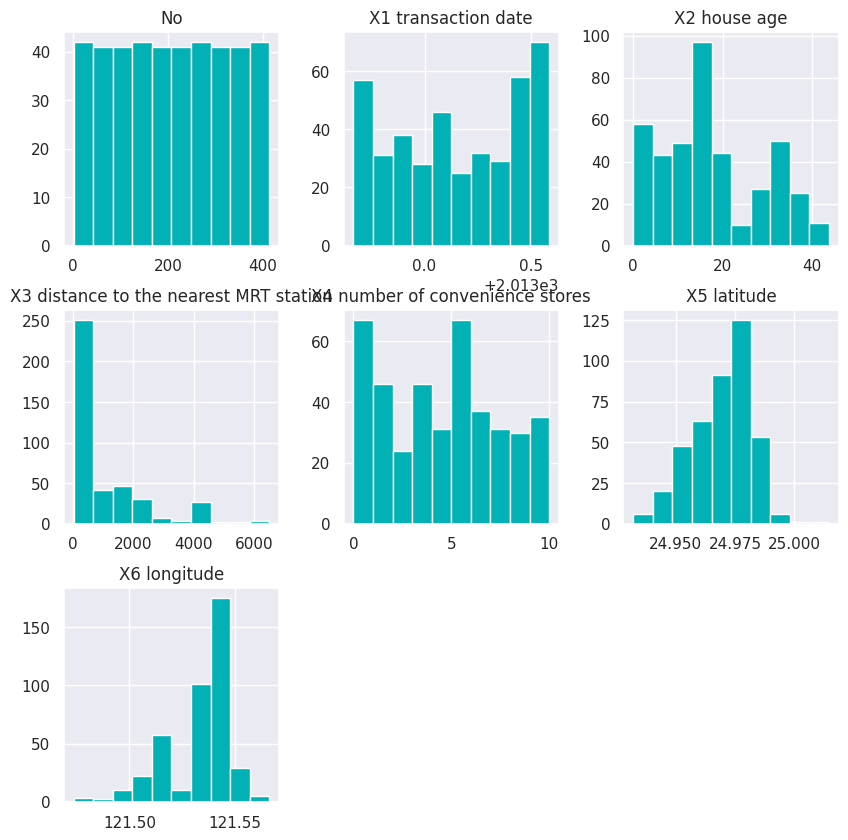

In [ ]:
## Visualisasi Data X ##
data_olah.iloc[:,:-1].hist(figsize=(10,10), color='#01b1b5')
plt.show()

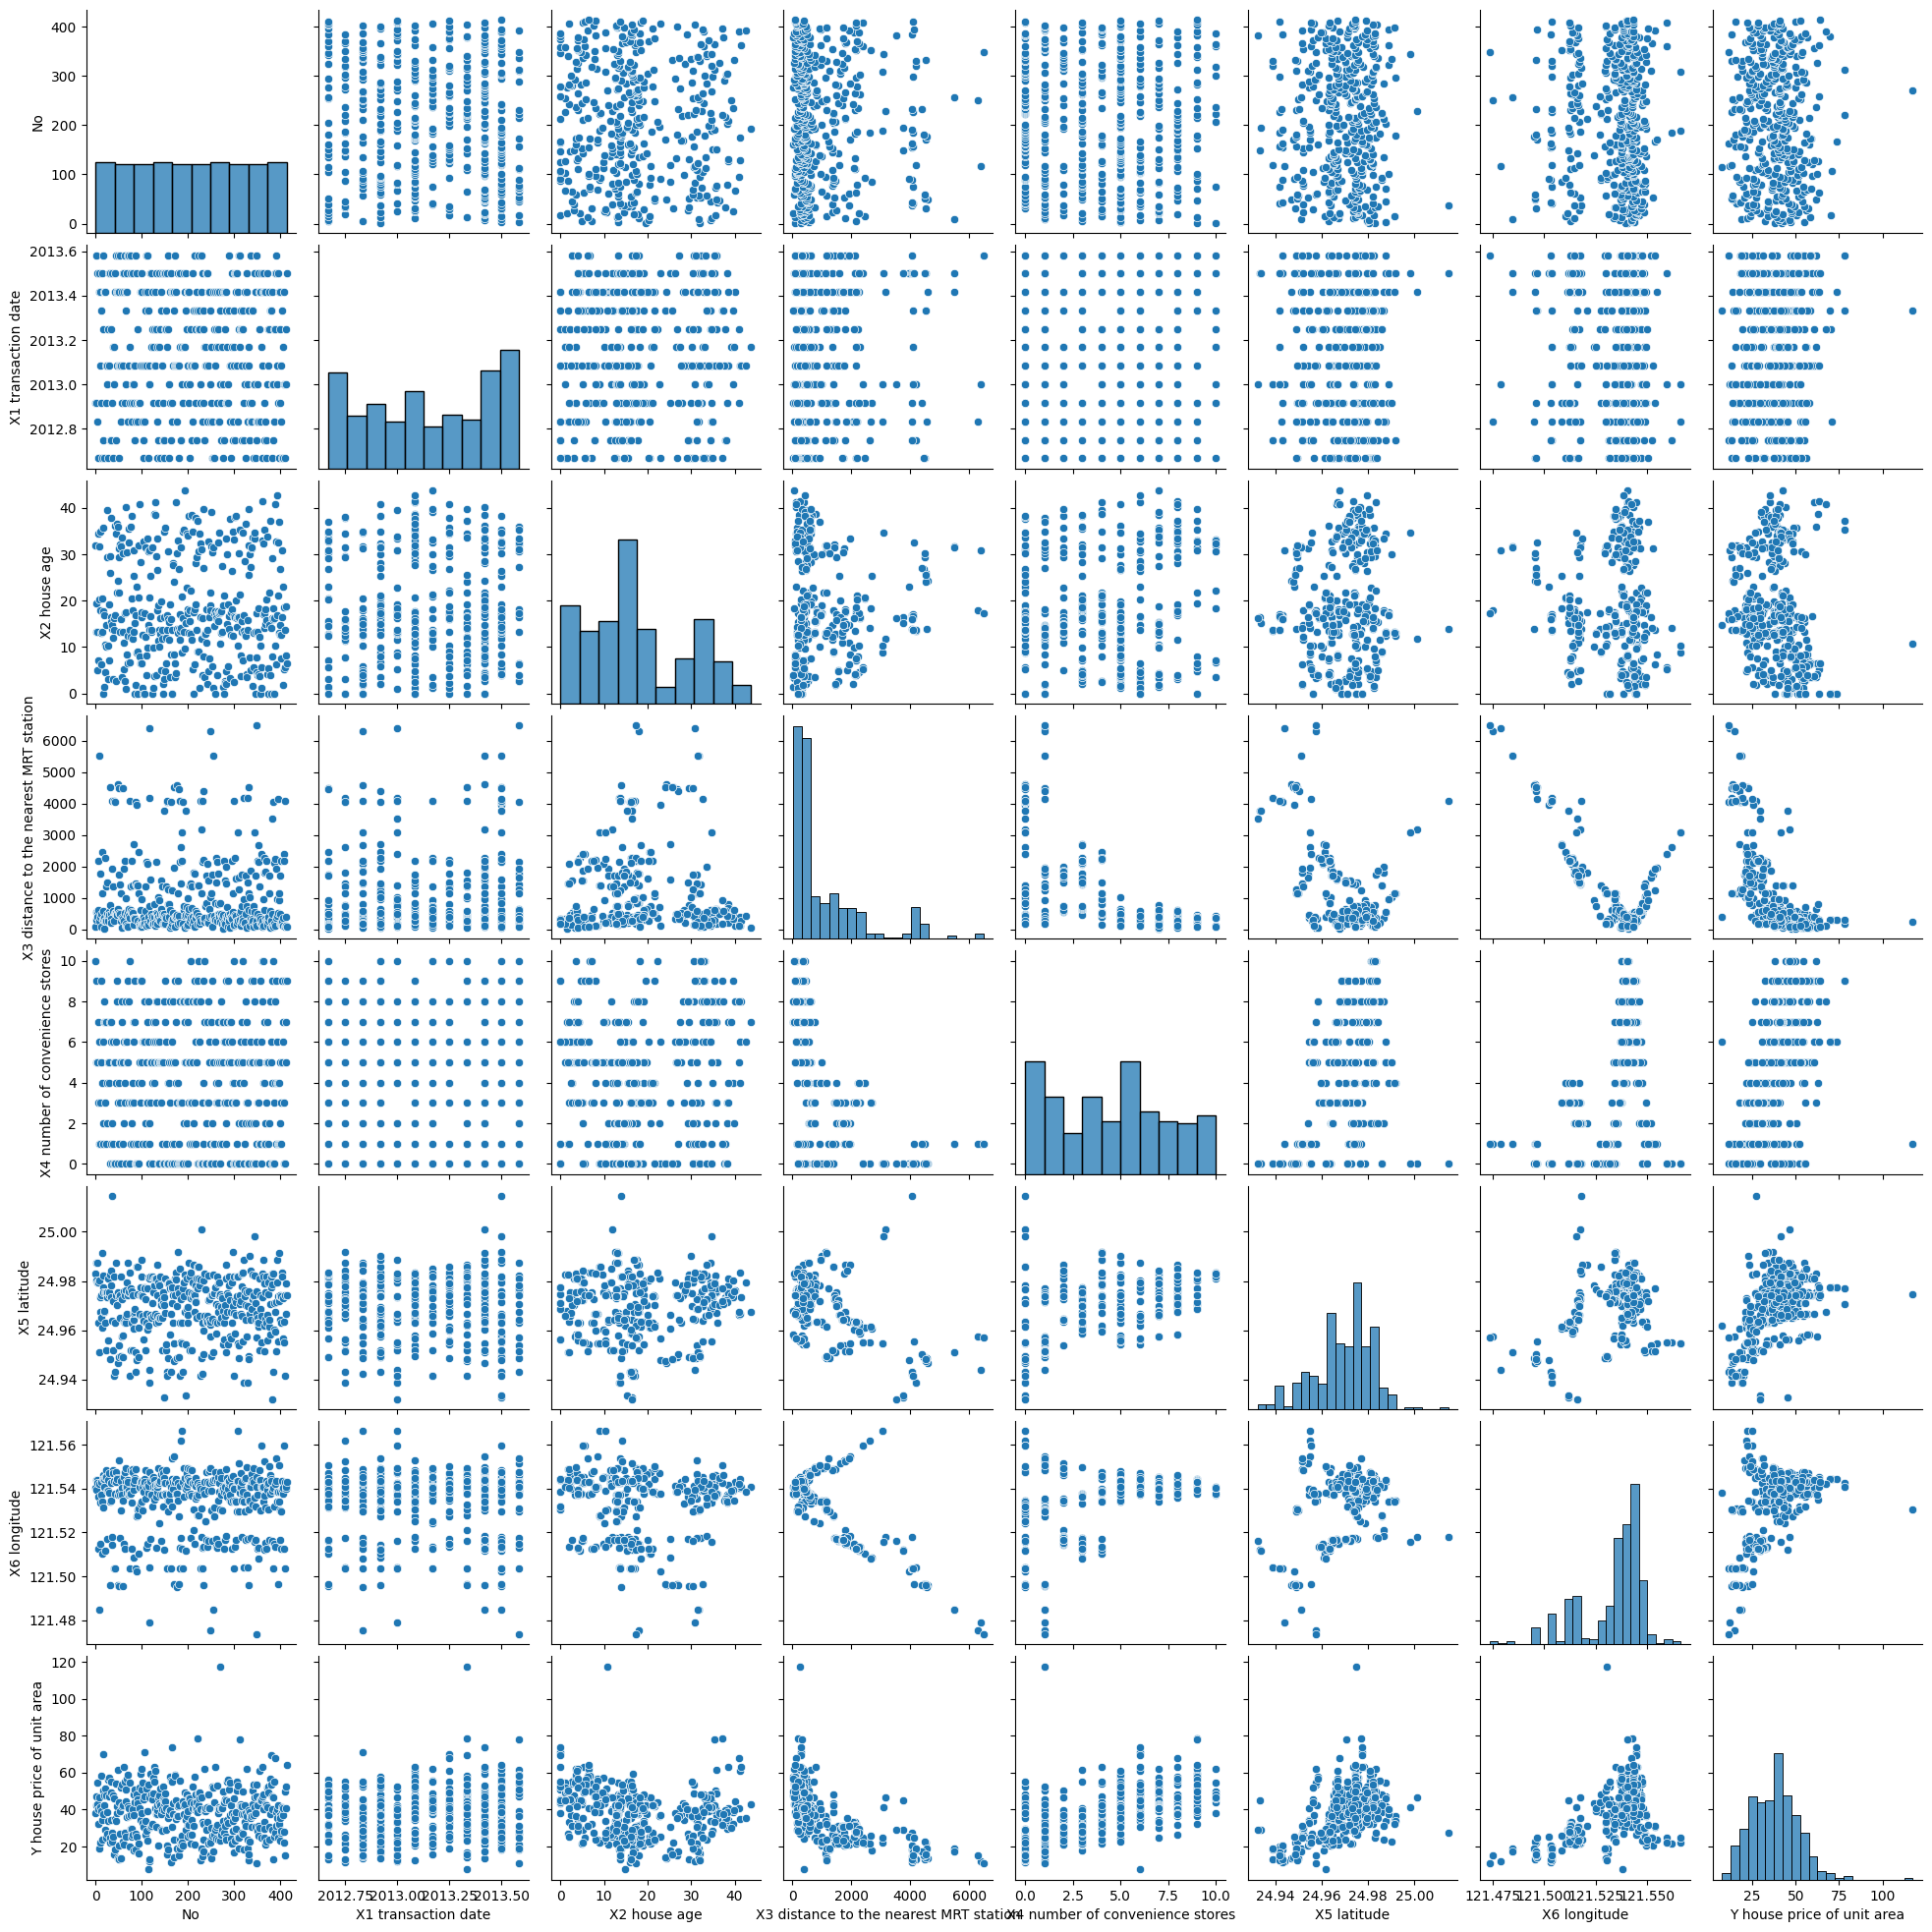

In [ ]:
sns.pairplot(data_olah)

In [ ]:
x = data_olah[['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area']]
y = data_olah[['Y house price of unit area']]

In [ ]:
data_olah = data_olah.drop("No", axis=1)

In [ ]:
#split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
print(model.coef_)

[[-7.91953963e-16 -3.41393580e-14  2.32452946e-16 -2.77555756e-17
   1.21430643e-16 -1.67454856e-15 -3.01170552e-14  1.00000000e+00]]


In [ ]:
print(model.intercept_)

[7.26032567e-11]


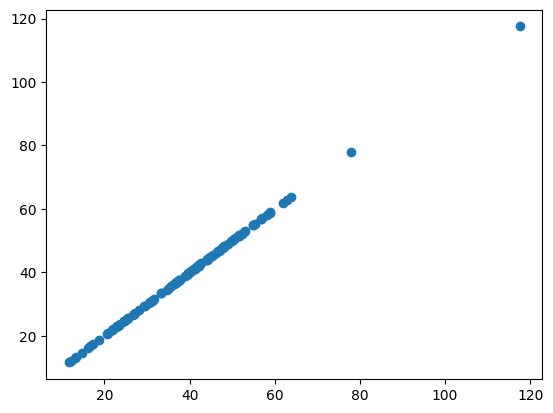

In [ ]:
predictions = model.predict(x_test)
plt.scatter(y_test, predictions)

(array([10., 13., 14., 15., 17., 14., 29.,  7.,  5.,  1.]),
 array([-1.98951966e-13, -1.54187774e-13, -1.09423581e-13, -6.46593890e-14,
        -1.98951966e-14,  2.48689958e-14,  6.96331881e-14,  1.14397380e-13,
         1.59161573e-13,  2.03925765e-13,  2.48689958e-13]),
 <BarContainer object of 10 artists>)

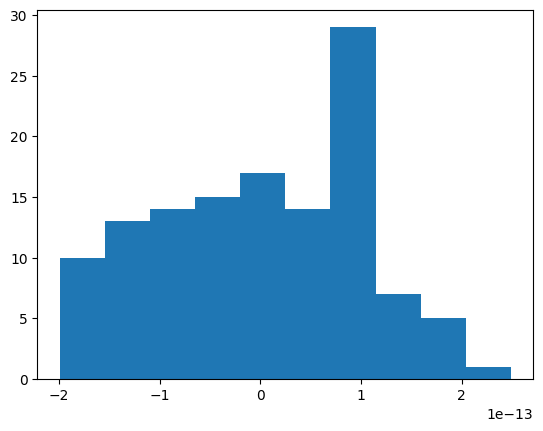

In [ ]:
plt.hist(y_test - predictions)

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_absolute_error(y_test, predictions)

8.748202162678353e-14

In [ ]:
metrics.mean_absolute_error(y_test, predictions)

8.748202162678353e-14

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1.0233912268017866e-13

CLUSTERING KMeans

In [ ]:
import pandas as pd
import numpy as np

Informasi dataset: https://archive.ics.uci.edu/ml/datasets/BuddyMove+Data+Set

In [ ]:
dataolah = pd.read_csv('/content/buddymove_holidayiq.csv')
dataolah.head() ## .tail()

,User Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,User 1,2,77,79,69,68,95
1,User 2,2,62,76,76,69,68
2,User 3,2,50,97,87,50,75
3,User 4,2,68,77,95,76,61
4,User 5,2,98,54,59,95,86


In [ ]:
X = dataolah.iloc[:, [3,4]].values

In [ ]:
from sklearn.cluster import KMeans

## visualisasi ##
import seaborn as sns
import matplotlib.pyplot as plt

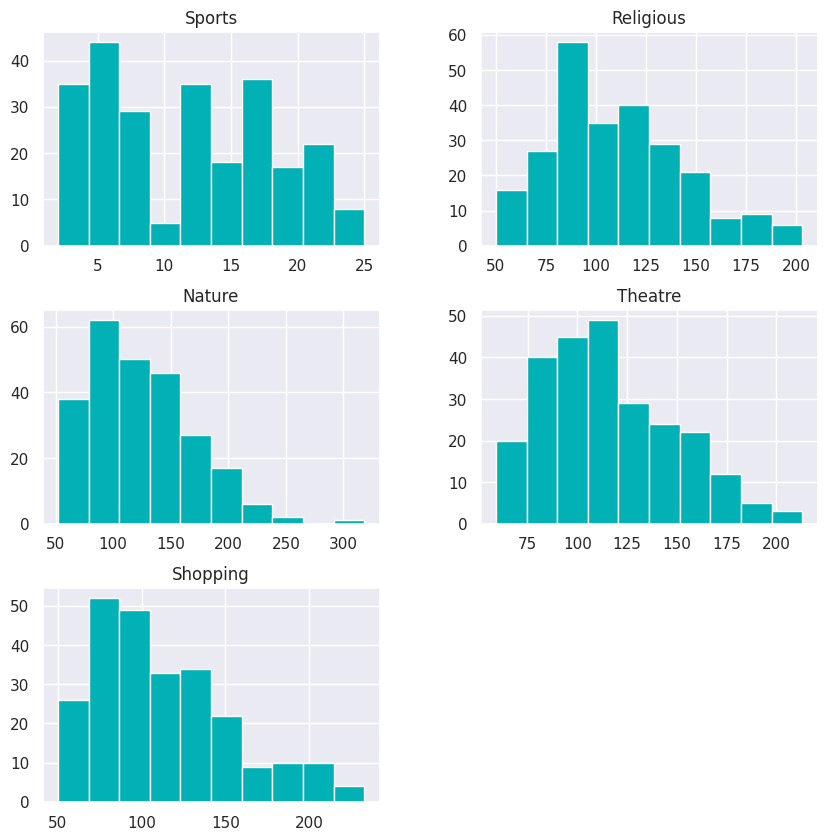

In [ ]:
## Visualisasi Data X ##
dataolah.iloc[:,:-1].hist(figsize=(10,10), color='#01b1b5')
plt.show()

In [ ]:
## mencari kelompok terbaik ##
wcss = []
for i in range(1,11):
    method_kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    method_kmeans.fit(X)
    wcss.append(method_kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [ ]:
sns.set_theme(style='darkgrid')

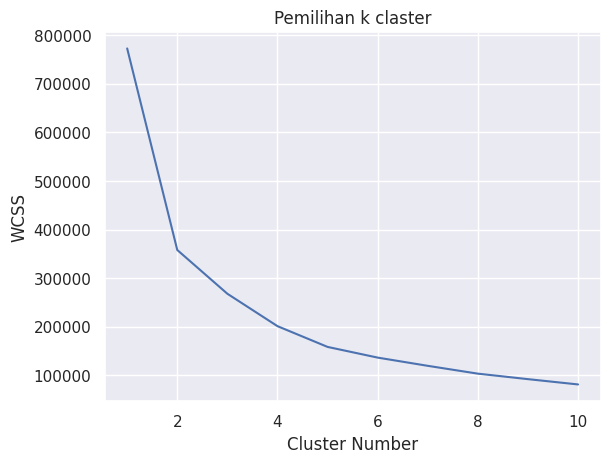

In [ ]:
plt.plot(range(1,11), wcss)
plt.title('Pemilihan k claster')
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')
plt.show()

In [ ]:
method_kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = method_kmeans.fit_predict(X)
y_kmeans

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 3, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 3, 0, 1, 0, 1, 0, 0, 3, 0, 3,
       3, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 3, 1, 0, 1, 1, 0, 3, 0, 0, 1,
       3, 0, 1, 0, 0, 0, 3, 3, 1, 1, 0, 3, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0,
       2, 3, 4, 0, 0, 3, 1, 2, 0, 2, 3, 0, 2, 3, 3, 0, 3, 4, 0, 1, 0, 3,
       4, 0, 2, 2, 1, 0, 0, 0, 0, 3, 0, 1, 0, 3, 0, 3, 1, 2, 2, 2, 2, 2,
       3, 0, 0, 4, 1, 0, 1, 0, 1, 4, 4, 1, 2, 4, 1, 2, 4, 2, 4, 2, 2, 3,
       4, 2, 2, 3, 2, 2, 2, 1, 4, 3, 4, 4, 2, 2, 3, 2, 4, 4, 3, 4, 4, 2,
       4, 0, 2, 2, 3, 2, 0, 2, 3, 2, 3, 1, 3, 4, 1, 1, 3, 2, 2, 1, 4, 4,
       2, 2, 2, 2, 3, 4, 2, 1, 0, 2, 0, 1, 2, 2, 2, 4, 3, 0, 2, 2, 1, 4,
       2, 4, 0, 4, 4, 2, 2], dtype=int32)

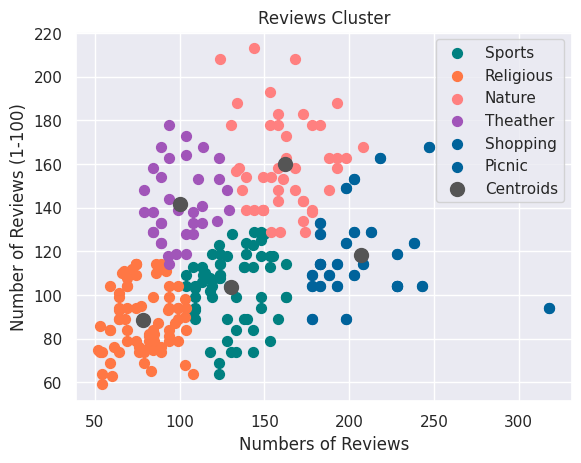

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = '#008080', label = 'Sports')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = '#FF7744', label = 'Religious')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = '#FF8080', label = 'Nature')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = '#A155B9', label = 'Theather')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = '#00639b', label = 'Shopping')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = '#00639b', label = 'Picnic')
plt.scatter(method_kmeans.cluster_centers_[:, 0], method_kmeans.cluster_centers_[:, 1], s = 100, c = '#555555', label = 'Centroids')
plt.title('Reviews Cluster')
plt.xlabel('Numbers of Reviews')
plt.ylabel('Number of Reviews (1-100)')
plt.legend()
plt.show()